# 0. Import all dependencies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import csv
from numerical_characteristics import DiscreteCharacteristics
from collections import Counter
from scipy import stats

# 1. Data processing

### 1.1 Read CSV

In [28]:
df = pd.read_csv('NBA_2004_2023_Shots.csv')
df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012556,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,Left Corner 3,Left Side,L,24+ ft.,23.3,9.55,23,1,11,21
4012557,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,Above the Break 3,Left Side Center,LC,24+ ft.,15.1,25.85,25,1,11,24
4012558,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,-4.7,9.85,6,1,11,39
4012559,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,Restricted Area,Center,C,Less Than 8 ft.,-2.3,6.05,2,1,11,42


### 1.2 Select needed data

In [29]:
westbrook = df[df['PLAYER_NAME'] == 'Russell Westbrook']
westbrook

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
116365,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Restricted Area,Center,C,Less Than 8 ft.,2.1,6.95,2,1,7,40
116366,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Above the Break 3,Center,C,24+ ft.,-7.0,29.35,25,1,6,59
116375,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Restricted Area,Center,C,Less Than 8 ft.,-0.9,6.55,1,1,1,43
116395,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,4.7,11.45,7,2,4,59
116396,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Restricted Area,Center,C,Less Than 8 ft.,0.7,6.25,1,2,4,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032069,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,8,52
3032078,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Mid-Range,Left Side,L,8-16 ft.,12.5,13.05,14,4,9,34
3032809,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,2,3,48
3032960,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,2,6,21


In [30]:
westbrook.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')

# 2. Calculate probability

### 2.1 Count all occurrences

In [31]:
distance = Counter(westbrook['SHOT_DISTANCE'])
distance = dict(distance)
distance = dict(sorted(distance.items()))
distance

{0: 2514,
 1: 2606,
 2: 1724,
 3: 713,
 4: 452,
 5: 374,
 6: 304,
 7: 279,
 8: 254,
 9: 304,
 10: 331,
 11: 395,
 12: 436,
 13: 571,
 14: 592,
 15: 687,
 16: 788,
 17: 778,
 18: 727,
 19: 561,
 20: 314,
 21: 174,
 22: 228,
 23: 328,
 24: 1305,
 25: 1229,
 26: 580,
 27: 230,
 28: 96,
 29: 39,
 30: 20,
 31: 9,
 32: 5,
 33: 3,
 34: 5,
 35: 4,
 36: 5,
 37: 3,
 38: 1,
 39: 2,
 40: 3,
 41: 2,
 42: 2,
 43: 2,
 44: 1,
 46: 1,
 49: 2,
 50: 1,
 51: 3,
 52: 2,
 53: 1,
 64: 1,
 68: 1,
 69: 1,
 77: 1}

### 2.2 Make a dict with values and probabilities

In [32]:
#fga = field goal attempts
fga = len(westbrook['SHOT_DISTANCE'])


In [33]:
distance_probability = distance.copy()
for key, value in distance_probability.items():
    # do something with value
    distance_probability[key] = round(distance[key]/fga, 5)
distance_probability

{0: 0.12574,
 1: 0.13034,
 2: 0.08623,
 3: 0.03566,
 4: 0.02261,
 5: 0.01871,
 6: 0.0152,
 7: 0.01395,
 8: 0.0127,
 9: 0.0152,
 10: 0.01655,
 11: 0.01976,
 12: 0.02181,
 13: 0.02856,
 14: 0.02961,
 15: 0.03436,
 16: 0.03941,
 17: 0.03891,
 18: 0.03636,
 19: 0.02806,
 20: 0.0157,
 21: 0.0087,
 22: 0.0114,
 23: 0.0164,
 24: 0.06527,
 25: 0.06147,
 26: 0.02901,
 27: 0.0115,
 28: 0.0048,
 29: 0.00195,
 30: 0.001,
 31: 0.00045,
 32: 0.00025,
 33: 0.00015,
 34: 0.00025,
 35: 0.0002,
 36: 0.00025,
 37: 0.00015,
 38: 5e-05,
 39: 0.0001,
 40: 0.00015,
 41: 0.0001,
 42: 0.0001,
 43: 0.0001,
 44: 5e-05,
 46: 5e-05,
 49: 0.0001,
 50: 5e-05,
 51: 0.00015,
 52: 0.0001,
 53: 5e-05,
 64: 5e-05,
 68: 5e-05,
 69: 5e-05,
 77: 5e-05}

### 2.3 Save to CSV

In [34]:
distribution_df = pd.DataFrame([distance_probability.keys(), distance_probability.values()])
distribution_df = distribution_df.T
distribution_df[0] = distribution_df[0].astype(int)
distribution_df[1] = distribution_df[1].astype(float)
header_list = ['X', 'P(X)']
distribution_df.to_csv('distribution.csv', index=False, header=header_list)


# 3. Numerical characteristics

### 3.2 Expectancy

### 3.3 Dispersion

### 3.4 Standard deviation (std)

### 3.5 Moment-generating function

##### 3.5.1 Calculate 1st raw moment (expectancy) using moment-generating function

### 3.6 Characteristic function

##### 3.6.1 Calculate 1st raw moment (expectancy) using characteristic function

### 3.7 Skewness

### 3.8 Kurtosis

# 4. Graphs

### 4.1 Probability mass function (PMF)

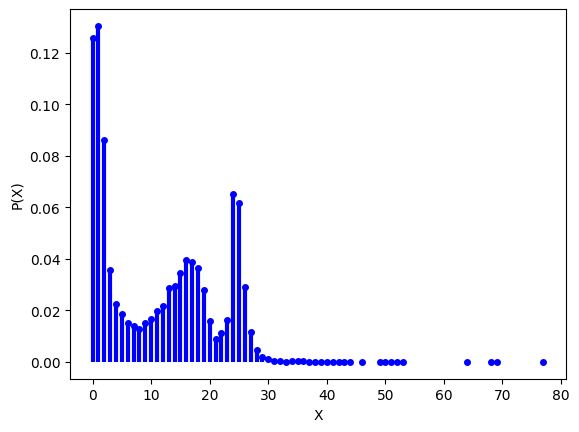

In [57]:
x = distance_object_to_discover.value
y = distance_object_to_discover.probability
plt.plot(x, y, 'bo', ms=4)
plt.vlines(x, 0, y, colors='b', lw=3)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

### 4.3 Cumulative Distribution Function